### 目錄
#### 請點選直接前往相關部分
* [函式庫引用](#library)
* [input1.bmp](#input1)
    + [result](#input1-result)

* [input2.bmp](#input2)
    + [result](#input2-result)
* [input3.bmp](#input3)
    + [result](#input3-result)
* [input4.bmp](#input4)
    + [result](#input4-result)

###  函式庫引用<a name="library" />

In [37]:
%matplotlib inline
import PIL as PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2
im = PIL.Image.open('input1.bmp')
im = np.asarray(im)
im2 = PIL.Image.open('input2.bmp')
im2 = np.asarray(im2)
im3 = PIL.Image.open('input3.bmp')
im3 = np.asarray(im3)
im4 = PIL.Image.open('input4.bmp')
im4 = np.asarray(im4)
from skimage import filters
from skimage import data,exposure,color
from skimage.morphology import disk
from skimage.filters.rank import median
from scipy.ndimage import gaussian_filter
plt.rcParams["figure.figsize"] = [8,6]

### Input1.bmp<a name="input1" />

In [18]:
med = im.copy()
med[:,:,0] = median(im[:,:,0], disk(1))
med[:,:,1] = median(im[:,:,1], disk(1))
med[:,:,2] = median(im[:,:,2], disk(1))

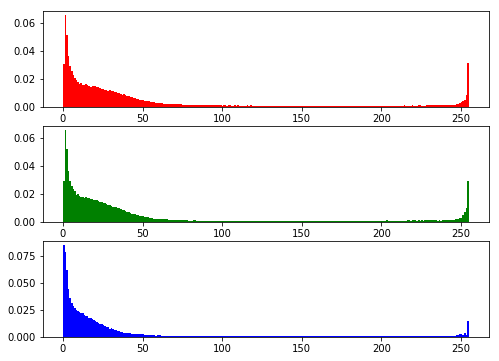

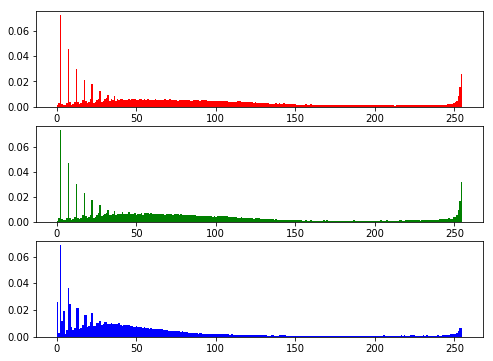

In [19]:
f,ax = plt.subplots(3,1)
ax[0].hist(im[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(im[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(im[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()

#直方圖平衡後，做兩次log轉換提升暗處亮度
im_hsv = color.rgb2hsv(med)
med_eq = im_hsv.copy()
 
med_eq[:,:,2] = exposure.equalize_adapthist(im_hsv[:,:,2],51)

med_eq[:,:,2] = np.log2(1.0+med_eq[:,:,2])
med_eq[:,:,2] = np.log2(1.0+med_eq[:,:,2])




med_eq_rgb = (color.hsv2rgb(med_eq)*255).astype(np.uint8)
output = PIL.Image.fromarray(med_eq_rgb)
output.save('output1.bmp')


f,ax = plt.subplots(3,1)
ax[0].hist(med_eq_rgb[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(med_eq_rgb[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(med_eq_rgb[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()



### input1結果<a name="input1-result" />

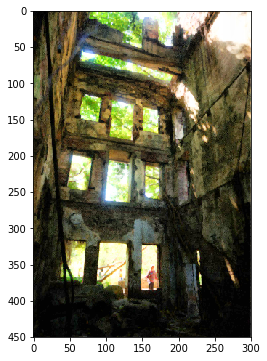

In [20]:
plt.imshow(med_eq_rgb)
plt.show()

### input2.bmp<a name="input2" />

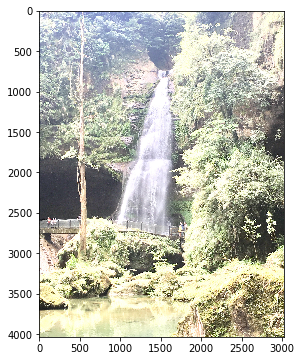

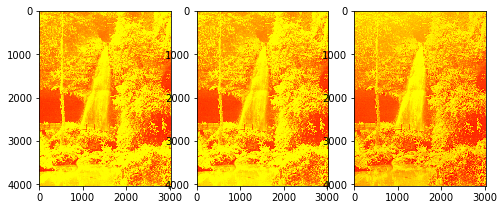

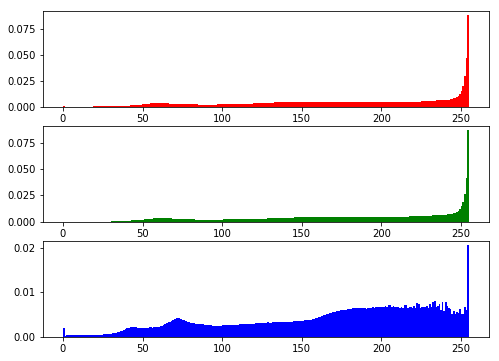

In [21]:
plt.imshow(im2)
plt.show()
# 先分析各色板熱度圖，與強度分布圖
f,ax = plt.subplots(1,3)
for i in range(3):
    ax[i].grid(False)
    ax[i].imshow(im2[:,:,i], cmap= 'autumn')
f.show()
f,ax = plt.subplots(3,1)
ax[0].hist(im2[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(im2[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(im2[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()

In [40]:
# 轉到HSV後，抽換V為B色板強度。
# 對V進行power轉換，降低亮處。
im2_hsv2 = color.rgb2hsv(im2)
im2_eq2 = im2_hsv2.copy()
im2_eq2[:,:,2] =im2[:,:,2]/255.0

im2_eq2[:,:,2]  = np.power(im2_eq2[:,:,2],1.5)
im2_eq2[:,:,1] += 0.07

im2_eq2[im2_eq2>1] = 1.0
im2_eq2[im2_eq2<0] = 0

im2_power_rgb2 = (color.hsv2rgb(im2_eq2)*255).astype(np.uint8)

o2 = PIL.Image.fromarray(im2_power_rgb2)
o2.save('output2.bmp')



### input2 result<a name="input2-result" />

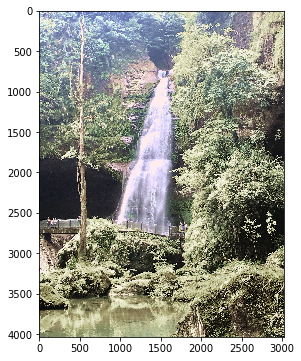

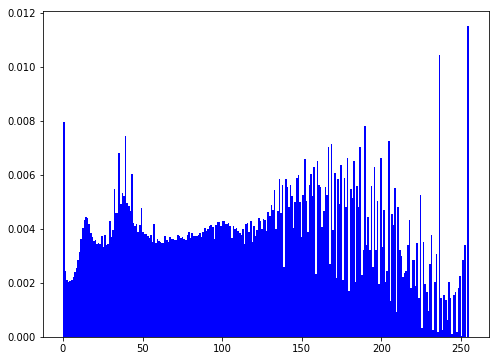

In [23]:
plt.show()
plt.imshow(im2_power_rgb2)
plt.show()
plt.hist(im2_power_rgb2[:,:,2].flatten(),bins=256,color='B',normed=True)
plt.show()

### input3.bmp<a name="input3" />

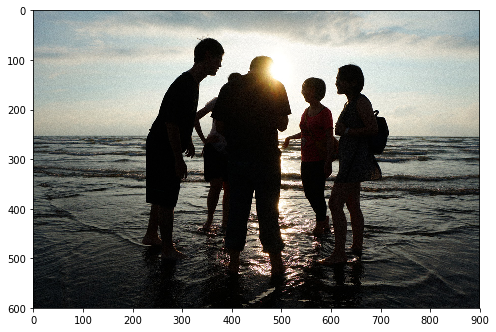

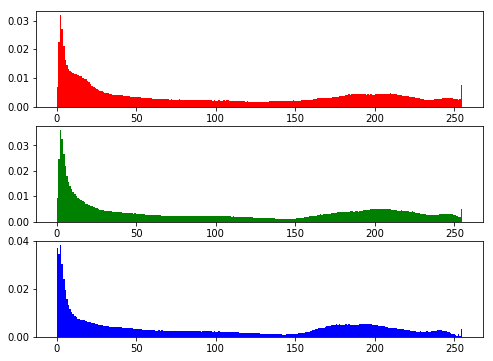

In [24]:
plt.imshow(im3)
plt.show()

f,ax = plt.subplots(3,1)
ax[0].hist(im3[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(im3[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(im3[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()

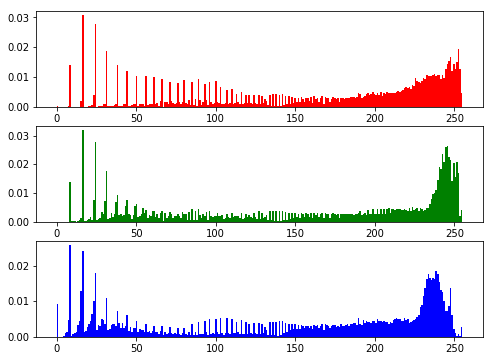

In [45]:
# 具有椒鹽雜訊，先過中值濾波
med = im3.copy()
med[:,:,0] = median(im3[:,:,0], disk(2))
med[:,:,1] = median(im3[:,:,1], disk(2))
med[:,:,2] = median(im3[:,:,2], disk(2))
im3_hsv = color.rgb2hsv(med)
# 連續做6次Log轉換，提升暗處亮度
im3_hsv[:,:,2] = np.log2(1.0+im3_hsv[:,:,2])
im3_hsv[:,:,2] = np.log2(1.0+im3_hsv[:,:,2])
im3_hsv[:,:,2] = np.log2(1.0+im3_hsv[:,:,2])
im3_hsv[:,:,2] = np.log2(1.0+im3_hsv[:,:,2])
im3_hsv[:,:,2] = np.log2(1.0+im3_hsv[:,:,2])
im3_hsv[:,:,2] = np.log2(1.0+im3_hsv[:,:,2])

im3_rgb = color.hsv2rgb(im3_hsv)*255.0


output3 = im3_rgb.astype(np.uint8)

o3 = PIL.Image.fromarray(output3)
o3.save('output3.bmp')

f,ax = plt.subplots(3,1)
ax[0].hist(output3[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(output3[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(output3[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()



### input3 result<a name="input3-result" />


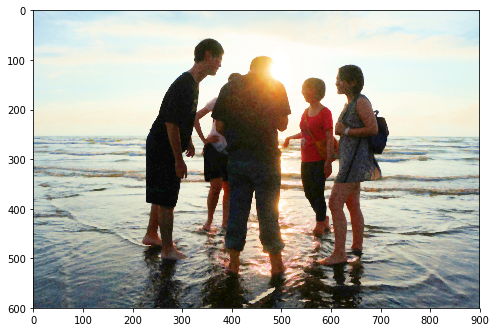

In [46]:
plt.imshow(output3)
plt.show()

### input4.bmp<a name="input4" />

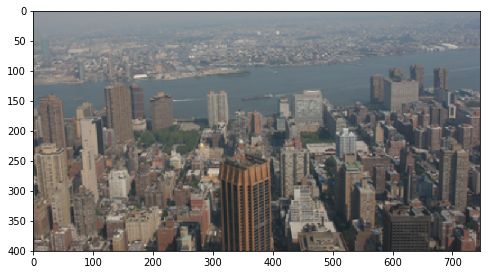

In [32]:
plt.imshow(im4)
plt.show()

In [33]:
# 此演算法需要3個部分，BlackChannel,A,T，分別建立函數。
def darkchannl(image,windowsize=(11,11)):
    White = [255,255,255]
    padwidth = windowsize[0]//2
    image_pad = cv2.copyMakeBorder(image,padwidth,padwidth,padwidth,padwidth,cv2.BORDER_CONSTANT,value=White)
    J_dark = np.zeros((image.shape[0],image.shape[1]))
    min_RGB = np.amin(image_pad,axis=2)
    for i in range(J_dark.shape[0]):
        for j in range(J_dark.shape[1]):
            J_dark[i][j] = np.min(min_RGB[i:i+windowsize[0],j:j+windowsize[1]].flatten())
    return J_dark
    plt.imshow(J_dark)
    plt.gray()
    plt.show()
def atmosphere(image, image_dark,ratio):
    image = image.reshape([-1, 3])
    image_dark = image_dark.flatten()
    top_k_index = np.argsort(image_dark)[-int(image_dark.size * ratio):]
    return np.mean(np.take(image, top_k_index, axis=0), axis=0)
def transmission(image,A,omaga):
    return 1.0-omaga*darkchannl(image/A)

In [47]:
# 依照演算法獲各個部分，t需要經過高斯模糊，以消除建築物光暈。
image_dark = darkchannl(im4,(7,7))
A = atmosphere(im4,image_dark,0.01)
t = transmission(im4,A.astype(np.float32),0.95)
t = gaussian_filter(t, sigma=10)

T = np.dstack([t,t,t])
dehaze_im = (im4.astype(np.int)-A.astype(np.float32))/T+A
dehaze_im[dehaze_im<0] = 0
dehaze_im[dehaze_im>255] = 255
dehaze_im = dehaze_im.astype(np.uint8)
dehaze_im_hsv = color.rgb2hsv(dehaze_im)

# 降低飽和度
dehaze_im_hsv[:,:,1] *= 0.8
dehaze_im = color.hsv2rgb(dehaze_im_hsv)*255.0
dehaze_im = dehaze_im.astype(np.uint8)
o4 = PIL.Image.fromarray(dehaze_im)
o4.save('output4.bmp')


### input4 result<a name="input4-result" />

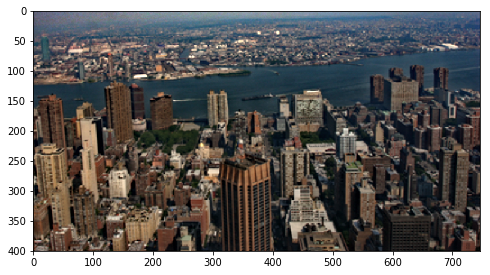

In [48]:
plt.imshow(dehaze_im)
plt.show()